In [1]:

import os
import shutil
import itertools
import pathlib
from PIL import Image

#Data handling tools
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report

#Deep learning libs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Activation , Dense , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam , Adamax
from tensorflow.keras import regularizers

#Warningds
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('C:/Users/BENLO/Documents/healthcare/archive/Skin cancer ISIC The International Skin Imaging Collaboration'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/BENLO/Documents/healthcare/archive/Skin cancer ISIC The International Skin Imaging Collaboration\Test\actinic keratosis\ISIC_0010512.jpg
C:/Users/BENLO/Documents/healthcare/archive/Skin cancer ISIC The International Skin Imaging Collaboration\Test\actinic keratosis\ISIC_0010889.jpg
C:/Users/BENLO/Documents/healthcare/archive/Skin cancer ISIC The International Skin Imaging Collaboration\Test\actinic keratosis\ISIC_0024468.jpg
C:/Users/BENLO/Documents/healthcare/archive/Skin cancer ISIC The International Skin Imaging Collaboration\Test\actinic keratosis\ISIC_0024470.jpg
C:/Users/BENLO/Documents/healthcare/archive/Skin cancer ISIC The International Skin Imaging Collaboration\Test\actinic keratosis\ISIC_0024511.jpg
C:/Users/BENLO/Documents/healthcare/archive/Skin cancer ISIC The International Skin Imaging Collaboration\Test\actinic keratosis\ISIC_0024646.jpg
C:/Users/BENLO/Documents/healthcare/archive/Skin cancer ISIC The International Skin Imaging Collaboration\Test\actinic kerat

In [2]:
train_data_path = 'C:/Users/BENLO/Documents/healthcare/archive/Skin cancer ISIC The International Skin Imaging Collaboration/Train'

filepaths =[]
labels = []

folds = os.listdir(train_data_path)

for fold in folds:
    f_path = os.path.join(train_data_path , fold)
    filelists = os.listdir(f_path)
    
    for file in filelists:
        filepaths.append(os.path.join(f_path , file))
        labels.append(fold)
        
#Concat data paths with labels
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
train_df = pd.concat([Fseries , Lseries] , axis = 1)

In [3]:
train_df

filepaths              label
0     C:/Users/BENLO/Documents/healthcare/archive/Sk...  actinic keratosis
1     C:/Users/BENLO/Documents/healthcare/archive/Sk...  actinic keratosis
2     C:/Users/BENLO/Documents/healthcare/archive/Sk...  actinic keratosis
3     C:/Users/BENLO/Documents/healthcare/archive/Sk...  actinic keratosis
4     C:/Users/BENLO/Documents/healthcare/archive/Sk...  actinic keratosis
...                                                 ...                ...
2243  C:/Users/BENLO/Documents/healthcare/archive/Sk...    vascular lesion
2244  C:/Users/BENLO/Documents/healthcare/archive/Sk...    vascular lesion
2245  C:/Users/BENLO/Documents/healthcare/archive/Sk...    vascular lesion
2246  C:/Users/BENLO/Documents/healthcare/archive/Sk...    vascular lesion
2247  C:/Users/BENLO/Documents/healthcare/archive/Sk...    vascular lesion

[2248 rows x 2 columns]

In [4]:
test_data_path = "C:/Users/BENLO/Documents/healthcare/archive/Skin cancer ISIC The International Skin Imaging Collaboration/Test"

filepaths = []
labels = []

folds = os.listdir(test_data_path)

for fold in folds:
    f_path = os.path.join(test_data_path,fold)
    file_lists = os.listdir(f_path)
    
    
    for file in file_lists:
        filepaths.append(os.path.join(f_path,file))
        labels.append(fold)
        
#Concat data paths with labels
Fseries = pd.Series(filepaths , name = 'filepaths')
Lseries = pd.Series(labels , name = 'label')
test_df = pd.concat([Fseries , Lseries] , axis = 1)

In [5]:
test_df

filepaths  \
0    C:/Users/BENLO/Documents/healthcare/archive/Sk...   
1    C:/Users/BENLO/Documents/healthcare/archive/Sk...   
2    C:/Users/BENLO/Documents/healthcare/archive/Sk...   
3    C:/Users/BENLO/Documents/healthcare/archive/Sk...   
4    C:/Users/BENLO/Documents/healthcare/archive/Sk...   
..                                                 ...   
113  C:/Users/BENLO/Documents/healthcare/archive/Sk...   
114  C:/Users/BENLO/Documents/healthcare/archive/Sk...   
115  C:/Users/BENLO/Documents/healthcare/archive/Sk...   
116  C:/Users/BENLO/Documents/healthcare/archive/Sk...   
117  C:/Users/BENLO/Documents/healthcare/archive/Sk...   

                       label  
0          actinic keratosis  
1          actinic keratosis  
2          actinic keratosis  
3          actinic keratosis  
4          actinic keratosis  
..                       ...  
113  squamous cell carcinoma  
114  squamous cell carcinoma  
115          vascular lesion  
116          vascular lesion  
117          vascular lesion  

[118 rows x 2 columns]

In [6]:
valid,test = train_test_split(test_df,train_size=0.5,shuffle=True,random_state=42)

In [7]:
img_size = (224 ,244)
batch_size = 16

tr_gen = ImageDataGenerator()
ts_gen= ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(train_df , x_col = 'filepaths' , y_col = 'label' , target_size = img_size ,
                                      class_mode = 'categorical' , color_mode = 'rgb' , shuffle = True , batch_size =batch_size)

valid_gen = ts_gen.flow_from_dataframe(valid , x_col = 'filepaths' , y_col = 'label' , target_size = img_size , 
                                       class_mode = 'categorical',color_mode = 'rgb' , shuffle= True, batch_size = batch_size)

test_gen = ts_gen.flow_from_dataframe(test , x_col= 'filepaths' , y_col = 'label' , target_size = img_size , 
                                      class_mode = 'categorical' , color_mode= 'rgb' , shuffle = False , batch_size = batch_size)

Found 2239 validated image filenames belonging to 9 classes.
Found 59 validated image filenames belonging to 9 classes.
Found 59 validated image filenames belonging to 9 classes.


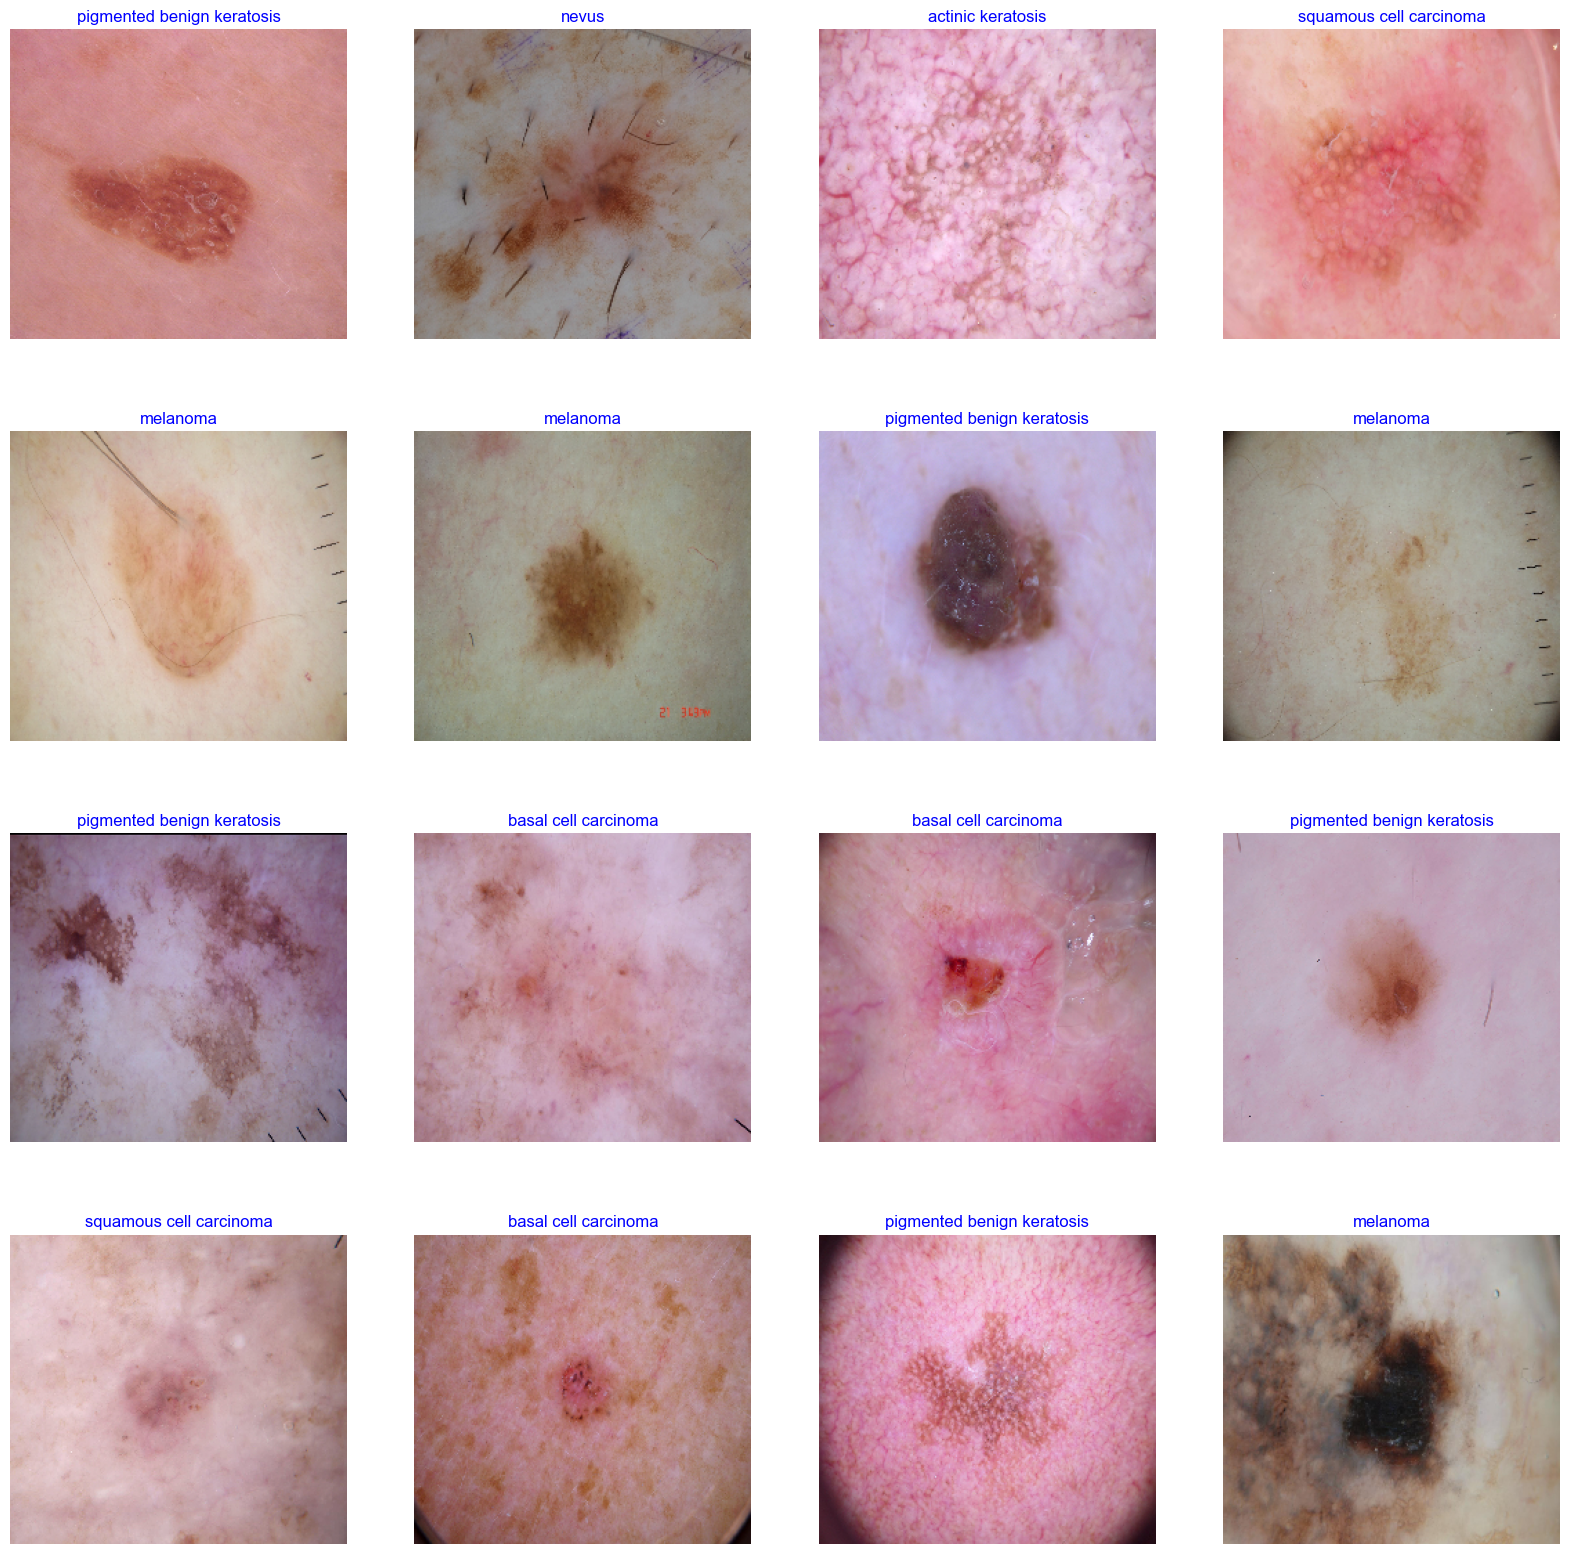

In [9]:
gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())
images , labels = next(train_gen)

plt.figure(figsize= (20,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name , color = 'blue' , fontsize= 12)
    plt.axis('off')
plt.show();

In [10]:
img_shape = (img_size[0] , img_size[1] , 3)
num_class = len(classes)

base_model = tf.keras.applications.efficientnet.EfficientNetB7(include_top = False , weights = 'imagenet' ,
                                                               input_shape = img_shape, pooling= 'max')
model = Sequential([
    base_model,
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    Dense(256, kernel_regularizer=regularizers.l2(0.016),
          activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006), activation='relu'),
    Dropout(rate=0.4, seed=75),
    Dense(num_class, activation='softmax')
])

model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional)  (None, 2560)             64097687  
                                                                 
 batch_normalization (BatchN  (None, 2560)             10240     
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               655616    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 9)                 2313      
                                                                 
Total params: 64,765,856
Trainable params: 64,450,009
Non-trainable params: 315,847
______________________________________

In [11]:
Epochs = 10

history = model.fit(x= train_gen , epochs = Epochs , verbose = 1 , validation_data = valid_gen ,
                   validation_steps = None , shuffle = False)

Epoch 1/10
140/140 [==============================] - 1346s 9s/step - loss: 9.6231 - accuracy: 0.4444 - val_loss: 9.7662 - val_accuracy: 0.4237
Epoch 2/10
140/140 [==============================] - 1204s 9s/step - loss: 7.3223 - accuracy: 0.6682 - val_loss: 7.4531 - val_accuracy: 0.4915
Epoch 3/10
140/140 [==============================] - 1209s 9s/step - loss: 5.8656 - accuracy: 0.7767 - val_loss: 6.5766 - val_accuracy: 0.4407
Epoch 4/10
140/140 [==============================] - 1226s 9s/step - loss: 4.7249 - accuracy: 0.8490 - val_loss: 6.1106 - val_accuracy: 0.4237
Epoch 5/10
140/140 [==============================] - 1226s 9s/step - loss: 3.8280 - accuracy: 0.8723 - val_loss: 4.4570 - val_accuracy: 0.4915
Epoch 6/10
140/140 [==============================] - 1454s 10s/step - loss: 3.0898 - accuracy: 0.9026 - val_loss: 3.9901 - val_accuracy: 0.5085
Epoch 7/10
140/140 [==============================] - 1458s 10s/step - loss: 2.4878 - accuracy: 0.9040 - val_loss: 3.6721 - val_accurac

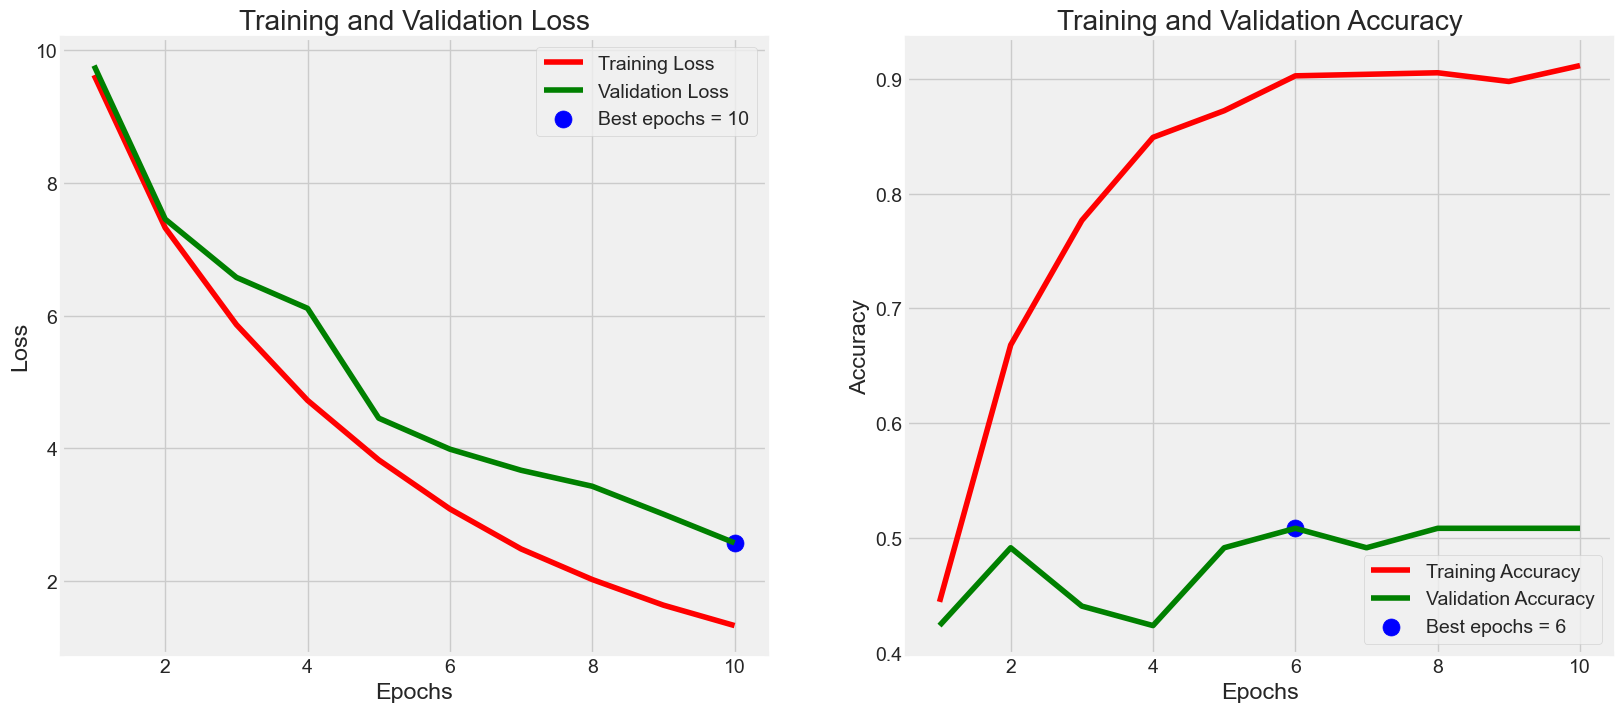

In [12]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

index_acc = np.argmax(val_acc)
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best epochs = {str(index_loss +1)}'
acc_label = f'Best epochs = {str(index_acc + 1)}'

#Training history

plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r' , label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss + 1 , val_lowest , s = 150 , c = 'blue',label = loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r' , label = 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s = 150 , c = 'blue',label = acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show();

In [13]:
train_score = model.evaluate(train_gen , steps =16 , verbose = 1)
valid_score = model.evaluate(valid_gen , steps = 16 , verbose = 1)
test_score = model.evaluate(test_gen , steps = 16 , verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

16/16 [==============================] - 8s 390ms/step - loss: 2.1702 - accuracy: 0.6610
Train Loss:  1.1027532815933228
Train Accuracy:  0.9296875
--------------------
Validation Loss:  2.5789031982421875
Validation Accuracy:  0.508474588394165
--------------------
Test Loss:  2.170175790786743
Test Accuracy:  0.6610169410705566


In [14]:
preds = model.predict_generator(test_gen)

y_pred = np.argmax(preds , axis = 1)

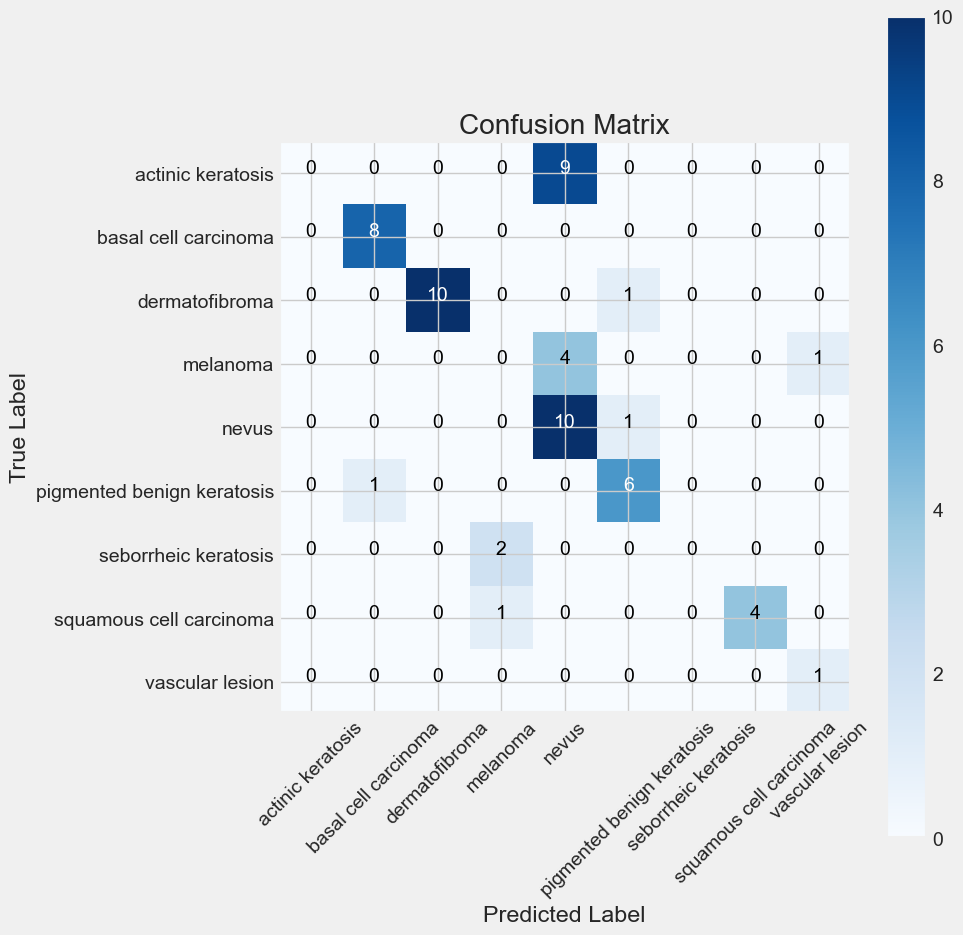

In [15]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [17]:
print(classification_report(test_gen.classes, y_pred , target_names= classes ))

                            precision    recall  f1-score   support

         actinic keratosis       0.00      0.00      0.00         9
      basal cell carcinoma       0.89      1.00      0.94         8
            dermatofibroma       1.00      0.91      0.95        11
                  melanoma       0.00      0.00      0.00         5
                     nevus       0.43      0.91      0.59        11
pigmented benign keratosis       0.75      0.86      0.80         7
      seborrheic keratosis       0.00      0.00      0.00         2
   squamous cell carcinoma       1.00      0.80      0.89         5
           vascular lesion       0.50      1.00      0.67         1

                  accuracy                           0.66        59
                 macro avg       0.51      0.61      0.54        59
              weighted avg       0.57      0.66      0.60        59



In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import requests
from io import BytesIO
from PIL import Image

# Define the URL of the image
image_url = 'https://dermnetnz.org/assets/collection/Basal-cell-carcinoma/basal-cell-carcinoma-0004.jpg'

# Function to load and preprocess the image
def load_and_preprocess_image(img_url, img_size):
    # Fetch the image from the URL
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content))
    img = img.resize((img_size[1], img_size[0]))  # Note the order: width first, then height

    # Convert the image to a numpy array
    img_array = image.img_to_array(img)

    # Expand dimensions to match the model input shape (1, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)

 # Normalize the image data to the range [0, 1]
    img_array /= 255.0
    
    return img_array

# Define the image size according to the expected input shape of the model
img_size = (224, 244)  # Height=224, Width=244

# Load and preprocess the image
preprocessed_image = load_and_preprocess_image(image_url, img_size)

# Make predictions using the model
predictions = model.predict(preprocessed_image)

# Get the predicted class (assuming you have a softmax output)
predicted_class = np.argmax(predictions, axis=1)
print("Predicted class index:", predicted_class)
print("Predicted probabilities:", predictions)

1/1 [==============================] - 4s 4s/step
Predicted class index: [4]
Predicted probabilities: [[0.05094224 0.05461916 0.07332217 0.1476784  0.5227779  0.07126072
  0.03937275 0.03209124 0.00793538]]
